## 5. 분할 정복 기법
- 정렬, 탐색에 효과적 / 순차&병렬 둘 다 효과적
- 마스터 정리 -> 점근적 수행 시간 계산가능(공식 외우는게 편할듯)
<br>
- 같은 부분문제가 여러번 나타나지 않을 때 써야 함!!(merge sort, closest pair같이)

T(N) = aT(N/b)+f(n) --> a는 분할된 문제 a개를 푸는데 걸리는 연산들, f(n)은 크기가 n인 원래의 문제를 분할하여 나누고 병합하여 최종 해를 만드는데 사용되는 연산들

### 5.1 병합 정렬

- 복잡도 O(nlogn)

In [10]:
def merge_sort(A, left, right):
    if left<right:
        mid = (left+right) // 2
        merge_sort(A, left, mid)
        merge_sort(A,mid+1, right)
        merge(A,left,mid,right)
    else:
        ...



def merge(A, left, mid, right):
    global sorted
    k = left
    i = left
    j = mid + 1

    while i<=mid and j<=right:
        if A[i]<=A[j]:
            sorted[k] = A[i]
            i, k = i+1, k+1
        else:
            sorted[k] = A[j]
            j, k = j+1, k+1

    if i>mid:
        sorted[k:k+right-j+1] = A[j:right+1]
    else:
        sorted[k:k+mid-i+1] = A[i:mid+1]
    
    A[left:right+1] = sorted[left:right+1]


data = [5, 3, 8, 4, 9, 1, 6, 2, 7]
sorted = [0]*10
print("Original: ",data)
merge_sort(data,0,len(data)-1)
print("MergeSort: ", data)

Original:  [5, 3, 8, 4, 9, 1, 6, 2, 7]
MergeSort:  [1, 2, 3, 4, 5, 6, 7, 8, 9]


### 5.2 퀵 정렬
- 최선-O(nlogn), 최악-O(n^2), 이미 정렬되어 있는 리스트
- 중간값을 이용하거나, hybrid 정렬, dual pivot 등 여러 응용 존재

In [3]:
#Hoare partition
def partition(A, left, right):
    low = left+1
    high = right
    pivot = A[left]

    while low<=high:
        while low <= right and A[low]<=pivot : low += 1
        while high >= left and A[high]>pivot : high -= 1
        
        if low < high :
            A[low], A[high] = A[high], A[low]
    
    A[left],A[high] = A[high], A[left]
    return high

def quick_sort(A, left, right):
    if left<right:
        mid = partition(A, left, right)
        quick_sort(A, left, mid-1)
        quick_sort(A, mid+1, right)


data = [5, 3, 8, 4, 9, 1, 6, 2, 7]
print("Original: ",data)
quick_sort(data,0,len(data)-1)
print("QuickSort: ", data)

Original:  [5, 3, 8, 4, 9, 1, 6, 2, 7]
QuickSort:  [1, 2, 3, 4, 5, 6, 7, 8, 9]


### 5.3 이진트리 관련 문제

In [56]:
class TNode:
    def __init__(self, data, left, right):
        self.data = data
        self.left = left
        self.right = right
    # def isLeaf(self):
    #     if self.left is None and self.right is None:
    #         return True
    #     else:
    #         return False
    def isLeaf(self):
        return self.left is None and self.right is None
d = TNode('D',None,None)
e = TNode('E',None,None)
b = TNode('B',d,e)
f = TNode('F',None,None)
c = TNode('C',f,None)
root = TNode('A',b,c)

# g = TNode('G', None, None)
# h = TNode('H', None, None)
# i = TNode('I', None, None)

# # 완전 이진 트리로 추가
# root.left.left.left = g
# root.left.left.right = h
# root.left.right.left = i



#### 5.3.1 이진트리의 높이 알고리즘

In [3]:
def calc_height(root):
    if root is None:
        return 0
    hleft = calc_height(root.left)
    hright = calc_height(root.right)
    return max(hleft,hright) + 1

calc_height(root)

3

#### 5.3.2 이진트리의 표준 순회 문제
- preorder: VLR
- inorder: LVR
- postorder: LRV


In [5]:
def preorder(n):
    if n is not None:
        print(n.data, end=' ')
        preorder(n.left)
        preorder(n.right)

def inorder(n):
    if n is not None:
        inorder(n.left)
        print(n.data, end = ' ')
        inorder(n.right)
def postorder(n):
    if n is not None:
        postorder(n.left)
        postorder(n.right)
        print(n.data, end=' ')


print("Preorder: ", end=' ')
preorder(root)
print()

print("Inorder: ", end=' ')
inorder(root)
print()

print("Postorder: ", end=' ')
postorder(root)


Preorder:  A B D E C F 
Inorder:  D B E A F C 
Postorder:  D E B F C A 

### 5.4 최근접 쌍의 거리 문제(심화)
- O(n(logn)^2) 을 O(nlogn)으로 개선하려면, strip_closest를 O(n)에 처리해야 함. 이를 위해서는 strip_closest 내부에서 정렬하지 않고, 미리 정렬하고 해당 함수를 호출해야 함. 
    - Challenge
    - closest_pair_dist()의 Pm~append 에서 정렬된 부분 리스트들을 병합하는 merge sort 이용해야 함
    - 그리고 실질적인 y방향 정렬의 시작은 억지기법 쓸 때(부분리스트 3이하)에서 시작해야 함.

In [76]:
import math
def calculate_distance(p1:tuple, p2:tuple):
    return math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)

def closest_pair(p):
    n=len(p)
    min_dist = float("inf")
    for i in range(n-1):
        for j in range(i+1,n):
            dist = calculate_distance(p[i],p[j])
            if dist < min_dist:
                min_dist = dist
    return min_dist

def strip_closest(P, d):
    n = len(P)
    d_min = d
    P.sort(key = lambda point:point[1])         #여기도 병합정렬 쓰면 더 줄일 수 있다

    for i in range(n):
        j = i+1
        while j<n and (P[j][1] - P[i][1]<d_min):
            dij = calculate_distance(P[i], P[j])
            if dij < d_min:
                d_min = dij
            j += 1
    return d_min


def closest_pair_dist(P, n):
    if n<=3:
        return closest_pair(P)
    
    mid = n//2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
    
    ds = strip_closest(Pm, d)
    return min(d, ds)


lst = [
    (2,3),
    (12,30),
    (40,50),
    (5,1),
    (12,10),
    (3,4)
]

import time
a = time.time()
closest_pair_dist(lst, len(lst))
b = time.time()
b-a

4.8160552978515625e-05

### 5.5 행렬 곱셈(심화)
- 억지기법으로 O(n^3)
- Strassen 기법
    - 행렬을 4개의 부분 행렬로 분할

### 5.6 O(n)의 피보나치수열

In [14]:
import numpy as np

def fib_iter(n):
    if n<2: return n
    last = 0
    current = 1
    for _ in range(2, n+1):
        tmp = current
        current += last
        last = tmp
    return current



#O(log n)
def fib_mat(n):
    if n<2: return n
    mat = np.array([[1, 1], [1, 0]], dtype=object)
    result = np.linalg.matrix_power(mat, n)
    return result[0][1]

for i in range(10):
    print(fib_mat(i), end = ' ')

0 1 1 2 3 5 8 13 21 34 

## practice

In [2]:
#1
def find_minimum(A):
    if len(A) <=2:
        return min(A)
    mid = len(A)//2
    left_min = find_minimum(A[:mid])
    right_min = find_minimum(A[mid:])

    return min(left_min, right_min)


lst = [7,4,9,6,3,8,7,5,1]
find_minimum(lst)


1

In [1]:
#8
def merge_iter(a,b):
    ...


def merge_sort_iter(A):
    global sorted
    lst = []
    step = 0
    for step in range(0,len(A),2):
        lst.append(A[step:step+2])


A = [7,4,9,6,3,8,7,5,1]
sorted = [0]*len(A)




In [12]:
#9
#merge_sort에서 merge 중 위치 변환 하는 횟수를 더하면될듯 + merge 함수에 inversion return하도록 추가하고


ValueError: min() arg is an empty sequence

In [27]:
#12
#Hoare partition
def partition(A, left, right):
    low = left+1
    high = right
    tmp = [A[left],A[right],A[(left+right)//2]]
    tmp.sort()
    print(tmp)
    pivot = tmp[1]
    # pivot = A[left]

    while low<=high:
        while low <= right and A[low]<=pivot : low += 1
        while high >= left and A[high]>pivot : high -= 1
        
        if low < high :
            A[low], A[high] = A[high], A[low]
    
    A[left],A[high] = A[high], A[left]
    return high

def quick_sort(A, left, right):
    if left<right:
        mid = partition(A, left, right)
        quick_sort(A, left, mid)
        quick_sort(A, mid+1, right)


data = [5, 3, 8, 4, 9, 1, 6, 2, 7]
print("Original: ",data)
quick_sort(data,0,len(data)-1)
print("QuickSort: ", data)

Original:  [5, 3, 8, 4, 9, 1, 6, 2, 7]
[5, 7, 9]
[5, 3, 8, 4, 9, 1, 6, 2, 7]

[4, 5, 6]
[6, 3, 7, 4, 2, 1, 5, 9, 8]

[1, 5, 6]
[1, 3, 5, 4, 2, 6, 7, 9, 8]

[1, 2, 5]
[2, 3, 5, 4, 1, 6, 7, 9, 8]

[1, 1, 2]
[1, 2, 5, 4, 3, 6, 7, 9, 8]

[3, 4, 5]
[1, 2, 5, 4, 3, 6, 7, 9, 8]

[3, 4, 5]
[1, 2, 3, 4, 5, 6, 7, 9, 8]

[3, 4, 4]
[1, 2, 4, 3, 5, 6, 7, 9, 8]

[3, 3, 4]
[1, 2, 3, 4, 5, 6, 7, 9, 8]

[8, 9, 9]
[1, 2, 3, 4, 5, 6, 7, 9, 8]

[8, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]

QuickSort:  [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [28]:
#16
def count_nodes(root):
    # if root.left is None:
    #     return 1
    # left = count_nodes(root.left)
    # right = count_nodes(root.right)
    # return left+right
    if root is None:
        return 0
    else:
        return 1+count_nodes(root.left)+count_nodes(root.right)

count_nodes(root)

    

6

In [38]:
#17
def count_leaf(root):
    if root is None: return 0
    elif root.isLeaf() : return 1
    else: return count_leaf(root.left)+count_leaf(root.right)

count_leaf(root)

3

In [68]:
class Node:
    def __init__(self, item, left=None, right=None):
        self.item = item
        self.left = left
        self.right = right

def calculate_depth(node):
    d = -1
    while node is not None:
        d += 1
        node = node.left
    return d

def is_complete_binary_tree(node, depth, level = 0):
    if node is None:
        return True

    if depth == level + 1:
        return node.left is not None and node.right is not None

    if depth > level + 1:
        return (node.left is not None and node.right is not None) and \
               is_complete_binary_tree(node.left, depth, level + 1) and \
               is_complete_binary_tree(node.right, depth, level + 1)
    
    return False

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
# root.right.right = Node(7)

if is_complete_binary_tree(root, calculate_depth(root)):
    print("This is a complete binary tree")
else:
    print("This is not a complete binary tree")


This is not a complete binary tree


In [62]:
#21
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def findNodeLevel(root, target, current_level=1):
    # 기저 조건: 노드가 None이면 0 반환 (찾지 못한 경우)
    if root is None:
        return 0

    # 기저 조건: 노드 값이 타겟과 일치하면 현재 레벨 반환
    if root.value == target:
        return current_level

    # 왼쪽 서브트리와 오른쪽 서브트리에서 재귀적으로 호출
    left_level = findNodeLevel(root.left, target, current_level + 1)
    right_level = findNodeLevel(root.right, target, current_level + 1)

    # 레벨이 0이면 해당 값이 서브트리에 존재하지 않음을 의미
    if left_level == 0 and right_level == 0:
        return 0

    # 레벨이 0이 아니라면 적어도 한 쪽 서브트리에는 존재함
    return max(left_level, right_level)

# 테스트를 위한 이진 트리 생성
#       A
#      / \
#     B   C
#    / \   \
#   D   E   F
root = TreeNode('A')
root.left = TreeNode('B')
root.right = TreeNode('C')
root.left.left = TreeNode('D')
root.left.right = TreeNode('E')
root.right.right = TreeNode('F')

# 특정 노드의 레벨 찾기
target_node_value = 'E'
level = findNodeLevel(root, target_node_value)

if level:
    print(f"The level of node '{target_node_value}' is: {level}")
else:
    print(f"Node '{target_node_value}' not found in the tree.")


The level of node 'E' is: 3


In [75]:
#22
import math
def calculate_distance(p1:tuple, p2:tuple):
    return math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)

def closest_pair(p):
    n=len(p)
    min_dist = float("inf")
    for i in range(n-1):
        for j in range(i+1,n):
            dist = calculate_distance(p[i],p[j])
            if dist < min_dist:
                min_dist = dist
    return min_dist

def strip_closest(P, d):
    n = len(P)
    d_min = d

    for i in range(n):
        j = i+1
        while j<n and (P[j][1] - P[i][1]<d_min):
            dij = calculate_distance(P[i], P[j])
            if dij < d_min:
                d_min = dij
            j += 1
    return d_min

def closest_pair_dist_2(P, n):
    if n<=3:
        P.sort(key = lambda pt:pt[1])
        return closest_pair(P)
    
    mid = n//2
    mid_x = P[mid][0]

    dl = closest_pair_dist_2(P[:mid], mid)
    dr = closest_pair_dist_2(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
    
    ds = strip_closest(Pm, d)
    return min(d, ds)


lst = [
    (2,3),
    (12,30),
    (40,50),
    (5,1),
    (12,10),
    (3,4)
]


import time
a = time.time()
closest_pair_dist_2(lst, len(lst))
b = time.time()
b-a


4.696846008300781e-05

In [48]:
#30
import numpy as np
def fib_mat(n):
    if n<2: return n
    mat = np.array([[1, 1], [1, 0]], dtype=object)
    result = np.linalg.matrix_power(mat, n)
    return result[0][1]

n=0
while fib_mat(n)<2**31:
    n+=1
else:
    print(n-1,fib_mat(n-1))

46 1836311903


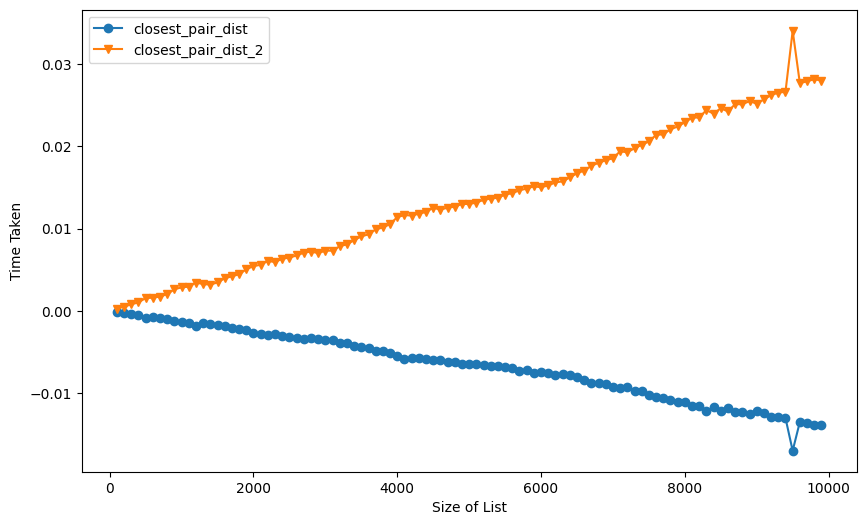

In [85]:
import matplotlib.pyplot as plt
import time
import random

time1_list = []
time2_list = []
size_list = []


for i in range(100,10000,100):
    lst = [(random.randint(1,1000),random.randint(1,1000)) for _ in range(i)]
    a2 = time.time()
    closest_pair_dist(lst, len(lst))
    a1 = time.time()
    closest_pair_dist_2(lst, len(lst))
    a3 = time.time()

    time1 = a2-a1
    time2 = a3-a2

    time1_list.append(time1)
    time2_list.append(time2)
    size_list.append(i)

plt.figure(figsize=(10, 6))
plt.plot(size_list, time1_list, marker='o', label='closest_pair_dist')
plt.plot(size_list, time2_list, marker='v', label='closest_pair_dist_2')
plt.xlabel('Size of List')
plt.ylabel('Time Taken')
plt.legend()
plt.show()